In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("A:\DATA\Imartics\Python\Innomatics_challenge2\web_app\data")
df=pd.read_csv("train.csv")
df.head()

,col1,col2,output
0,-38.366669,113.000000,1
1,-39.818572,123.943369,1
2,-55.638240,114.551862,1
3,-36.378005,95.616515,1
4,-39.366669,112.000000,1


In [3]:
dfp=ProfileReport(df,title="TRAIN")
dfp.to_notebook_iframe()

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

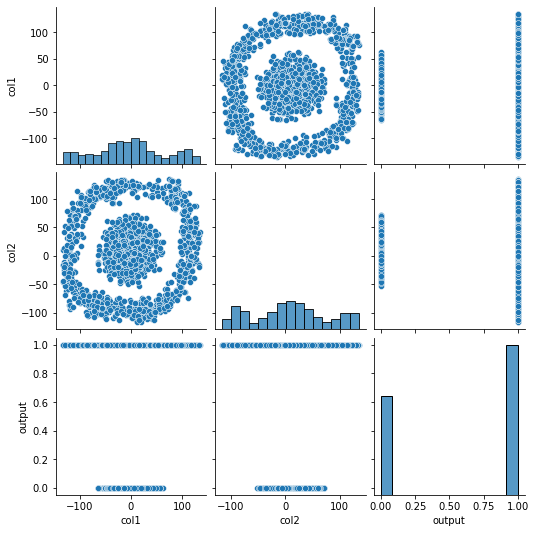

In [4]:
sns.pairplot(df)

<AxesSubplot:xlabel='col1'>

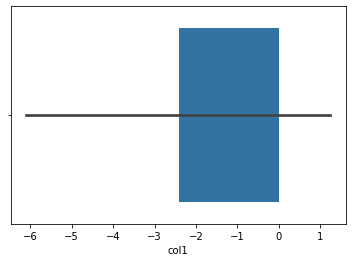

In [5]:
sns.barplot(x='col1', data=df)

<AxesSubplot:xlabel='output', ylabel='count'>

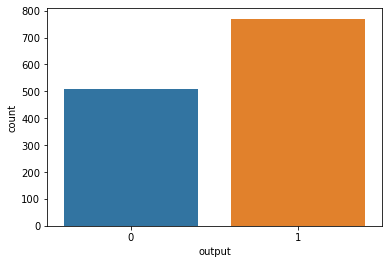

In [6]:
sns.countplot(x='output', data=df)

In [7]:
X=df.drop(["output"],axis = 1)
y=df["output"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((958, 2), (320, 2), (958,), (320,))

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [13]:
y_pred = lr.predict(X_test)

In [14]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.628125

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  0 119]
 [  0 201]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       119
           1       0.63      1.00      0.77       201

    accuracy                           0.63       320
   macro avg       0.31      0.50      0.39       320
weighted avg       0.39      0.63      0.48       320



In [16]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
y_pred = svc.predict(X_test)

In [18]:
metrics.accuracy_score(y_test, y_pred)

0.628125

In [19]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  0 119]
 [  0 201]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       119
           1       0.63      1.00      0.77       201

    accuracy                           0.63       320
   macro avg       0.31      0.50      0.39       320
weighted avg       0.39      0.63      0.48       320



In [20]:
svcr = SVC(kernel='rbf')
svcr.fit(X_train, y_train)

SVC()

In [21]:
y_pred = svcr.predict(X_test)

In [22]:
metrics.accuracy_score(y_test, y_pred)

1.0

In [23]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[119   0]
 [  0 201]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       201

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [24]:
import pickle

In [26]:
from pickle import dump

dump(svcr, open('A:\DATA\Imartics\Python\Innomatics_challenge2\web_app\pickle\Pickle_lr_Model.pkl', 'wb'))

In [27]:
from pickle import load

In [28]:
def predict(arr):
    classifier = load(open('A:\DATA\Imartics\Python\Innomatics_challenge2\web_app\pickle\Pickle_lr_Model.pkl', 'rb'))
    prediction = classifier.predict(arr)
    return prediction

In [29]:
Value_1=input('Enter Value_1 :')
Value_2=input('Enter Value_2 :')
arr = np.array([Value_1,Value_2]).reshape(1,-1)

prediction = predict(arr)

print(prediction)

Enter Value_1 :20.62765565
Enter Value_2 :16.14702209
[0]
